In [50]:
# !pip install google-play-scraper

In [51]:
# !pip install sastrawi

In [52]:
# !pip install wordcloud

In [53]:
# !pip install nltk

In [54]:
from google_play_scraper import app, reviews, Sort, reviews_all
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\taqiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taqiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# from google_play_scraper import app, reviews_all, Sort

# # Mengambil semua ulasan dari aplikasi dengan ID com.akademi.crypto
# scrapreview = reviews_all(
#     'com.stockbit.android', lang='id', sort=Sort.NEWEST, count=3500, country='id'
# )

In [56]:
# import csv
 
# with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Review'])  # Menulis header kolom
#     for review in scrapreview:
#         writer.writerow([review['content']])

In [57]:
# app_reviews_df = pd.DataFrame(scrapreview)
# app_reviews_df.shape
# app_reviews_df.head()
# app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

# jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [58]:
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

In [59]:
jumlah_ulasan, jumlah_kolom

(13452, 11)

In [60]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13452 entries, 0 to 13451
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              13452 non-null  object
 1   userName              13452 non-null  object
 2   userImage             13452 non-null  object
 3   content               13452 non-null  object
 4   score                 13452 non-null  int64 
 5   thumbsUpCount         13452 non-null  int64 
 6   reviewCreatedVersion  11414 non-null  object
 7   at                    13452 non-null  object
 8   replyContent          10658 non-null  object
 9   repliedAt             10658 non-null  object
 10  appVersion            11414 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [61]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,920b9473-361e-4445-a3d1-f4a5638fb54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.9.29,2025-05-20 14:39:21,"Hello Clash Dole,\n\nIt's great to read your p...",2025-05-20 17:18:10,3.9.29
1,93c7625b-d765-4fbf-b42a-15a093eec071,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,super,5,0,3.9.29,2025-05-20 14:29:50,"Halo kak Mochamad,\n\nTerimakasih untuk review...",2025-05-20 17:17:14,3.9.29
2,1a8b2611-6643-46ab-a43e-55bbb1362d54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jozz,5,0,3.9.29,2025-05-20 12:55:55,"Halo kak kostrad502 kostrad,\n\nTerima kasih u...",2025-05-20 13:08:43,3.9.29
3,cbe5212e-399f-407e-acb1-57cf6d6122c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😍,5,0,3.9.29,2025-05-20 12:42:53,"Halo kak Makhsun,\n\nTerimakasih untuk reviewn...",2025-05-20 13:07:47,3.9.29
4,7a4d25bf-38ba-4dd1-b74b-9d27035bbd57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren mudah di pahami,5,0,3.9.29,2025-05-20 12:12:45,"Halo kak avatar mf,\n\nSenang sekali baca revi...",2025-05-20 13:06:49,3.9.29


In [62]:
clean_df = app_reviews_df.dropna()

In [63]:
clean_df.shape

(8965, 11)

In [64]:
clean_df = clean_df.drop_duplicates()

clean_df.shape

(8965, 11)

In [65]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(["woyy","kak","kaka","kakak",'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [66]:
slangwords = {
    "@": "di", 
    "abis": "habis", 
    "wtb": "beli", 
    "masi": "masih", 
    "wts": "jual", 
    "wtt": "tukar", 
    "bgt": "banget", 
    "maks": "maksimal", 
    "bisa": "dapat", 
    "gk": "tidak", 
    "gpp": "tidak apa-apa", 
    "gmn": "bagaimana", 
    "bkn": "bukan", 
    "klo": "kalau", 
    "kpn": "kapan", 
    "kmn": "kemana", 
    "sama": "dengan", 
    "sbg": "sebagai", 
    "smua": "semua", 
    "sbgmna": "bagaimana", 
    "sblm": "sebelum", 
    "smpai": "sampai", 
    "sbg": "sebagai", 
    "sbgmn": "bagaimana", 
    "sblm": "sebelum", 
    "smpai": "sampai", 
    "smua": "semua", 
    "smg": "semoga", 
    "sy": "saya", 
    "tks": "terima kasih", 
    "tp": "tetapi", 
    "trims": "terima kasih", 
    "trus": "terus", 
    "udh": "sudah", 
    "yuk": "ayo", 
    "yg": "yang",
    "yoi": "ya",
    "yg": "yang",
    "gak": "tidak",
    "ga": "tidak",
    "bgt": "banget",
    "bikin": "membuat",
    "dr": "dari",
    "tdk": "tidak",
    "udh": "sudah",
    "blm": "belum",
    "dgn": "dengan",
    "utk": "untuk",
    "bgus": "bagus",
    "tp": "tapi",
    "bs": "bisa",
    "trs": "terus",
    "sdh": "sudah",
    "kmrn": "kemarin",
    "lbh": "lebih",
    "krn": "karena",
    "aja": "saja",
    "ntr": "nanti",
    "pdhl": "padahal",
    "td": "tadi"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [67]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [68]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,920b9473-361e-4445-a3d1-f4a5638fb54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.9.29,2025-05-20 14:39:21,"Hello Clash Dole,\n\nIt's great to read your p...",2025-05-20 17:18:10,3.9.29,good,good,good,[good],[good],good
1,93c7625b-d765-4fbf-b42a-15a093eec071,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,super,5,0,3.9.29,2025-05-20 14:29:50,"Halo kak Mochamad,\n\nTerimakasih untuk review...",2025-05-20 17:17:14,3.9.29,super,super,super,[super],[super],super
2,1a8b2611-6643-46ab-a43e-55bbb1362d54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jozz,5,0,3.9.29,2025-05-20 12:55:55,"Halo kak kostrad502 kostrad,\n\nTerima kasih u...",2025-05-20 13:08:43,3.9.29,Jozz,jozz,jozz,[jozz],[jozz],jozz
3,cbe5212e-399f-407e-acb1-57cf6d6122c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😍,5,0,3.9.29,2025-05-20 12:42:53,"Halo kak Makhsun,\n\nTerimakasih untuk reviewn...",2025-05-20 13:07:47,3.9.29,,,,[],[],
4,7a4d25bf-38ba-4dd1-b74b-9d27035bbd57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren mudah di pahami,5,0,3.9.29,2025-05-20 12:12:45,"Halo kak avatar mf,\n\nSenang sekali baca revi...",2025-05-20 13:06:49,3.9.29,keren mudah di pahami,keren mudah di pahami,keren mudah di pahami,"[keren, mudah, di, pahami]","[keren, mudah, pahami]",keren mudah pahami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,b5db97c3-3074-48ba-8763-5a912fcc41b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sekarang jadi sangat jelek setelah...,1,0,1.7.6,2018-03-15 15:26:31,Silahkan diupgrade dan dicoba kembali.,2018-04-26 11:53:21,1.7.6,Aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,"[aplikasinya, sekarang, jadi, sangat, jelek, s...","[aplikasinya, jelek, upgrade, force, close, mu...",aplikasinya jelek upgrade force close mulujadi...
13404,820f9503-ce34-4a13-906d-929983012dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Parah ga bisa login...padahal udah masukkin em...,1,3,1.7.2,2018-01-13 08:27:27,"Hi Andi DM, \nMohon maaf untuk gangguannya. Bi...",2018-01-13 10:58:15,1.7.2,Parah ga bisa loginpadahal udah masukkin email...,parah ga bisa loginpadahal udah masukkin email...,parah tidak dapat loginpadahal udah masukkin e...,"[parah, tidak, dapat, loginpadahal, udah, masu...","[parah, loginpadahal, udah, masukkin, email, b...",parah loginpadahal udah masukkin email benerma...
13413,ebee6760-622f-48f5-ad25-8c8b7c97919e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"terimakasih atas bantuannya, yang ada masalah ...",5,1,1.6.2,2017-12-19 09:20:11,Silahkan logout dan login kembali.,2017-12-19 08:20:29,1.6.2,terimakasih atas bantuannya yang ada masalah d...,terimakasih atas bantuannya yang ada masalah d...,terimakasih atas bantuannya yang ada masalah d...,"[terimakasih, atas, bantuannya, yang, ada, mas...","[terimakasih, bantuannya, aplikasinya, coba, l...",terimakasih bantuannya aplikasinya coba logout...
13442,f3c816c7-bb8a-4339-b794-5f31b3a33b4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,I am really pissed off with the bug when u cli...,3,1,1.5.0,2017-03-18 16:46:29,"Hi Naufal,\nThank you for your feedback. Some ...",2017-03-21 12:04:37,1.5.0,I am really pissed off with the bug when u cli...,i am really pissed off with the bug when u cli...,i am really pissed off with the bug when u cli...,"[i, am, really, pissed, off, with, the, bug, w...","[really, pissed, bug, u, click, chart, tab, sh...",really pissed bug u click chart tab showed not...


In [69]:
import csv 
import requests
from io import StringIO

lexicon_positive = dict()

# Mengirim request ke URL dan mendapatkan konten CSV
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1]) # Menambahkan kata-kata positif dan skornya kedalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1]) # Menambahkan kata-kata negatif dan skornya kedalam kamus lexicon_negative

else:
    print("Failed to fetch negative lexicon data")

In [70]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if(word in lexicon_positive):
            score += lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score += lexicon_negative[word]
    
    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity
# Menghitung skor sentimen dan polaritas untuk setiap ulasan

In [71]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())
print(clean_df['polarity_score'].value_counts())

polarity
positive    4108
negative    2914
neutral     1943
Name: count, dtype: int64
polarity_score
 0     1943
 5     1116
 4      683
-2      634
 3      630
       ... 
-36       1
 26       1
-46       1
 25       1
 20       1
Name: count, Length: 63, dtype: int64


In [72]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,920b9473-361e-4445-a3d1-f4a5638fb54e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,3.9.29,2025-05-20 14:39:21,"Hello Clash Dole,\n\nIt's great to read your p...",2025-05-20 17:18:10,3.9.29,good,good,good,[good],[good],good,5,positive
1,93c7625b-d765-4fbf-b42a-15a093eec071,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,super,5,0,3.9.29,2025-05-20 14:29:50,"Halo kak Mochamad,\n\nTerimakasih untuk review...",2025-05-20 17:17:14,3.9.29,super,super,super,[super],[super],super,1,positive
2,1a8b2611-6643-46ab-a43e-55bbb1362d54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jozz,5,0,3.9.29,2025-05-20 12:55:55,"Halo kak kostrad502 kostrad,\n\nTerima kasih u...",2025-05-20 13:08:43,3.9.29,Jozz,jozz,jozz,[jozz],[jozz],jozz,0,neutral
3,cbe5212e-399f-407e-acb1-57cf6d6122c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😍,5,0,3.9.29,2025-05-20 12:42:53,"Halo kak Makhsun,\n\nTerimakasih untuk reviewn...",2025-05-20 13:07:47,3.9.29,,,,[],[],,0,neutral
4,7a4d25bf-38ba-4dd1-b74b-9d27035bbd57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren mudah di pahami,5,0,3.9.29,2025-05-20 12:12:45,"Halo kak avatar mf,\n\nSenang sekali baca revi...",2025-05-20 13:06:49,3.9.29,keren mudah di pahami,keren mudah di pahami,keren mudah di pahami,"[keren, mudah, di, pahami]","[keren, mudah, pahami]",keren mudah pahami,3,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,b5db97c3-3074-48ba-8763-5a912fcc41b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sekarang jadi sangat jelek setelah...,1,0,1.7.6,2018-03-15 15:26:31,Silahkan diupgrade dan dicoba kembali.,2018-04-26 11:53:21,1.7.6,Aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,aplikasinya sekarang jadi sangat jelek setelah...,"[aplikasinya, sekarang, jadi, sangat, jelek, s...","[aplikasinya, jelek, upgrade, force, close, mu...",aplikasinya jelek upgrade force close mulujadi...,-6,negative
13404,820f9503-ce34-4a13-906d-929983012dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Parah ga bisa login...padahal udah masukkin em...,1,3,1.7.2,2018-01-13 08:27:27,"Hi Andi DM, \nMohon maaf untuk gangguannya. Bi...",2018-01-13 10:58:15,1.7.2,Parah ga bisa loginpadahal udah masukkin email...,parah ga bisa loginpadahal udah masukkin email...,parah tidak dapat loginpadahal udah masukkin e...,"[parah, tidak, dapat, loginpadahal, udah, masu...","[parah, loginpadahal, udah, masukkin, email, b...",parah loginpadahal udah masukkin email benerma...,-5,negative
13413,ebee6760-622f-48f5-ad25-8c8b7c97919e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"terimakasih atas bantuannya, yang ada masalah ...",5,1,1.6.2,2017-12-19 09:20:11,Silahkan logout dan login kembali.,2017-12-19 08:20:29,1.6.2,terimakasih atas bantuannya yang ada masalah d...,terimakasih atas bantuannya yang ada masalah d...,terimakasih atas bantuannya yang ada masalah d...,"[terimakasih, atas, bantuannya, yang, ada, mas...","[terimakasih, bantuannya, aplikasinya, coba, l...",terimakasih bantuannya aplikasinya coba logout...,6,positive
13442,f3c816c7-bb8a-4339-b794-5f31b3a33b4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,I am really pissed off with the bug when u cli...,3,1,1.5.0,2017-03-18 16:46:29,"Hi Naufal,\nThank you for your feedback. Some ...",2017-03-21 12:04:37,1.5.0,I am really pissed off with the bug when u cli...,i am really pissed off with the bug when u cli...,i am really pissed off with the bug when u cli...,"[i, am, really, pissed, off, with, the, bug, w...","[really, pissed, bug, u, click, chart, tab, sh...",really pissed bug u cl

Text(0.5, 1.0, 'Distribusi Polaritas Ulasan')

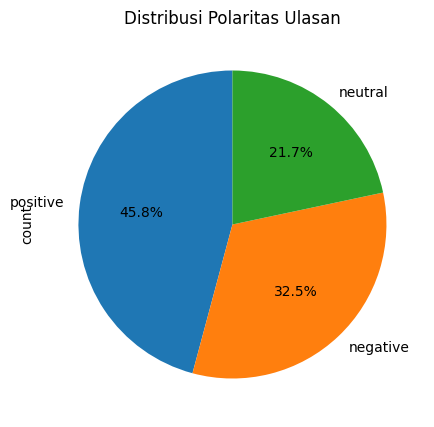

In [73]:
clean_df['polarity'].value_counts().plot(kind='pie', color=['green', 'red'], figsize=(10, 5), autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Polaritas Ulasan')

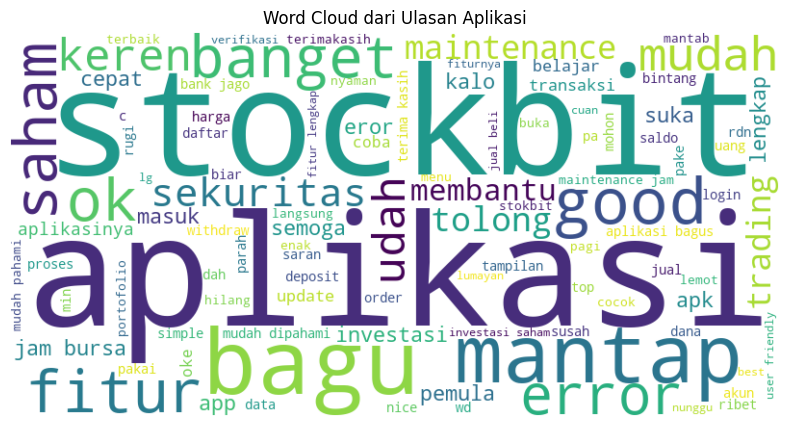

In [74]:
# Menampilkan semua ulasan
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'  # bisa juga: 'plasma', 'inferno', 'cool', dll
).generate(clean_df['text_akhir'].str.cat(sep=' '))

# Tampilkan dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Ulasan Aplikasi')
plt.show()

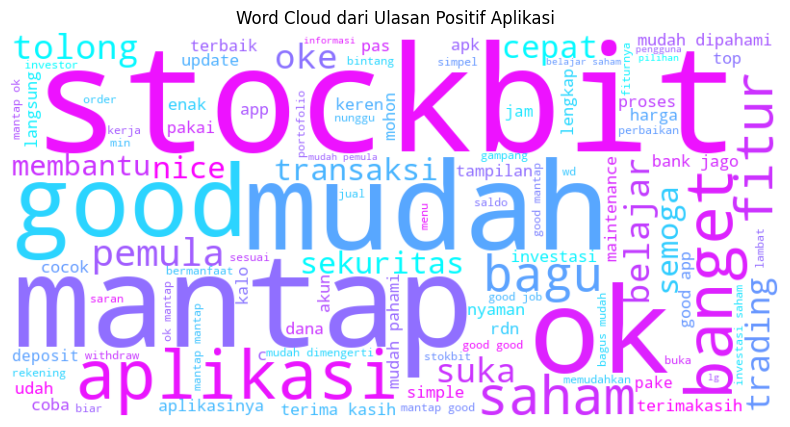

In [75]:
# Menampilkan word cloud ulasan positif
positive_reviews = clean_df[clean_df['polarity'] == 'positive']
# positive_reviews = positive_reviews[['content', 'polarity_score']]

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='cool'  # bisa juga: 'plasma', 'inferno', 'cool', dll
).generate(positive_reviews['text_akhir'].str.cat(sep=' '))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Positif Aplikasi')
plt.show()

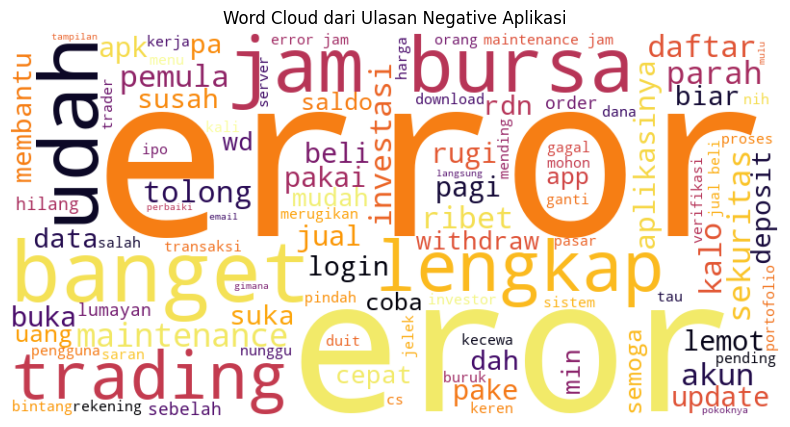

In [76]:
# Menampilkan wordcloud untuk ulasan negatif
# Menampilkan word cloud ulasan positif
positive_reviews = clean_df[clean_df['polarity'] == 'negative']
# positive_reviews = positive_reviews[['content', 'polarity_score']]

# Daftar kata yang ingin dikecualikan dari wordcloud
excluded_words = {'aplikasi', 'stockbit', 'bagus', 'saham', 'masuk', 'fitur'}  # contoh, bisa ditambah sesuai kebutuhan

# Gabungkan semua kata dari kolom 'text_akhir' menjadi satu string
all_words = positive_reviews['text_akhir'].str.cat(sep=' ')

# Buat string baru tanpa kata-kata yang dikecualikan
filtered_words = ' '.join(word for word in all_words.split() if word not in excluded_words)

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='inferno'  # bisa juga: 'plasma', 'inferno', 'cool', dll
).generate(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Negative Aplikasi')
plt.show()

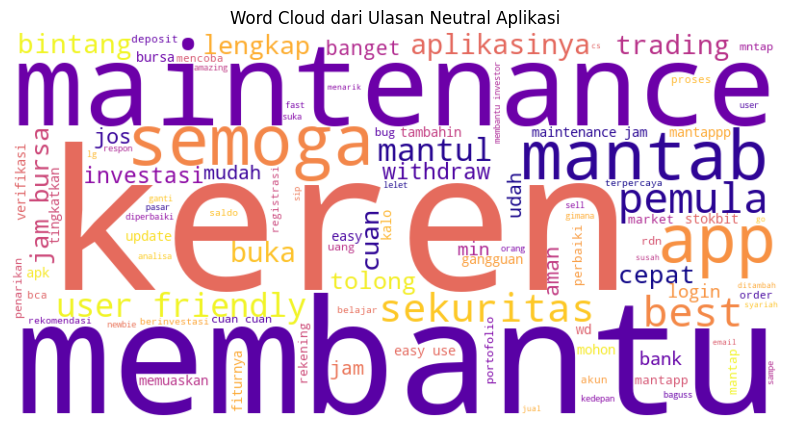

In [79]:
# Menampilkan wordcloud untuk ulasan neutral
# Menampilkan word cloud ulasan positif
positive_reviews = clean_df[clean_df['polarity'] == 'neutral']
# positive_reviews = positive_reviews[['content', 'polarity_score']]


# Gabungkan semua kata dari kolom 'text_akhir' menjadi satu string
all_words = positive_reviews['text_akhir'].str.cat(sep=' ')

# Buat string baru tanpa kata-kata yang dikecualikan
filtered_words = ' '.join(word for word in all_words.split() if word not in excluded_words)

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='plasma'  # bisa juga: 'plasma', 'inferno', 'cool', dll
).generate(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Neutral Aplikasi')
plt.show()

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Skema untuk TF-IDF
# Menggunakan TF-IDF untuk mengubah teks menjadi representasi numerik

X = clean_df['text_akhir']
y = clean_df['polarity']

y = y.map({'positive': 1, 'negative': 0, 'neutral': 2})

tfidf = TfidfVectorizer(max_features=None, min_df=1, max_df=1)
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [91]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Tokenisasi teks
tokenized_text = [word_tokenize(text) for text in clean_df['text_akhir']]

# Membuat model Word2Vec
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
wv = model.wv  # Simpan referensi agar lebih cepat

# Fungsi untuk mengambil rata-rata vektor kata dalam satu teks
def get_word_vectors(text):
    words = word_tokenize(text)
    vectors = [wv[word] for word in words if word in wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(wv.vector_size)

# Menghitung vektor representasi untuk setiap teks
X_word2vec = np.array([get_word_vectors(text) for text in clean_df['text_akhir']])

# Normalisasi fitur agar lebih stabil untuk model ML
scaler = StandardScaler()
X_word2vec_scaled = scaler.fit_transform(X_word2vec)

y_word2vec = clean_df['polarity']

# Mengubah y menjadi numerik
y_word2vec = y_word2vec.map({'positive': 1, 'negative': 0, 'neutral': 2})

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec_scaled, y_word2vec, test_size=0.2, random_state=42)

In [94]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

model_lr_word2vec = LogisticRegression()
model_lr_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_lr_word2vec_train = model_lr_word2vec.predict(X_train_word2vec)
y_pred_lr_word2vec_test = model_lr_word2vec.predict(X_test_word2vec)

model_lr_tfidf = LogisticRegression()
model_lr_tfidf.fit(X_train, y_train)

y_pred_lr_tfidf_train = model_lr_tfidf.predict(X_train)
y_pred_lr_tfidf_test = model_lr_tfidf.predict(X_test)

model_xgb_word2vec = XGBClassifier()
model_xgb_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_xgb_word2vec_train = model_xgb_word2vec.predict(X_train_word2vec)
y_pred_xgb_word2vec_test = model_xgb_word2vec.predict(X_test_word2vec)

model_xgb_tfidf = XGBClassifier()
model_xgb_tfidf.fit(X_train, y_train)

y_pred_xgb_tfidf_train = model_xgb_tfidf.predict(X_train)
y_pred_xgb_tfidf_test = model_xgb_tfidf.predict(X_test)

model_rf_word2vec = RandomForestClassifier()
model_rf_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_rf_word2vec_train = model_rf_word2vec.predict(X_train_word2vec)
y_pred_rf_word2vec_test = model_rf_word2vec.predict(X_test_word2vec)

model_rf_tfidf = RandomForestClassifier()
model_rf_tfidf.fit(X_train, y_train)

y_pred_rf_tfidf_train = model_rf_tfidf.predict(X_train)
y_pred_rf_tfidf_test = model_rf_tfidf.predict(X_test)





c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
    # plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], rotation=0)
    plt.show()


Logistic Regression Word2Vec Train Accuracy: 0.7184885666480758
Logistic Regression Word2Vec Test Accuracy: 0.7105409927495817
Logistic Regression TF-IDF Train Accuracy: 0.6496095928611266
Logistic Regression TF-IDF Test Accuracy: 0.47796988287785835


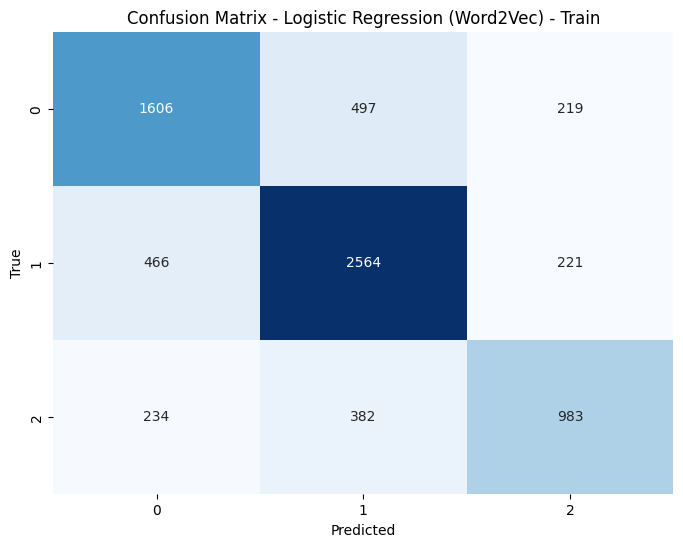

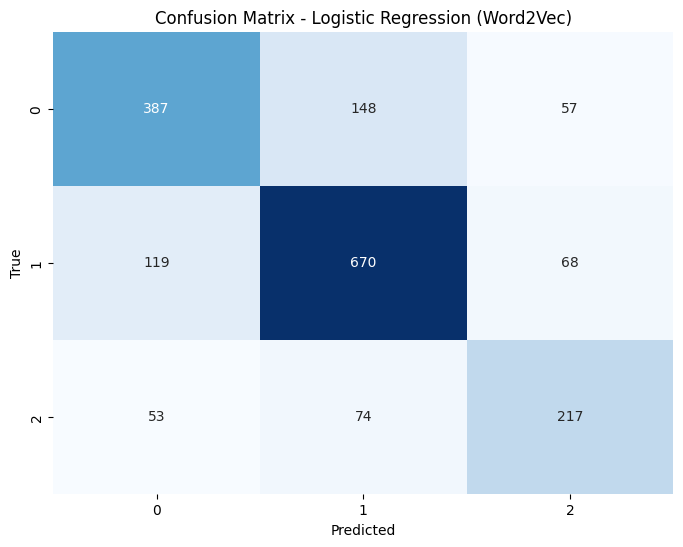

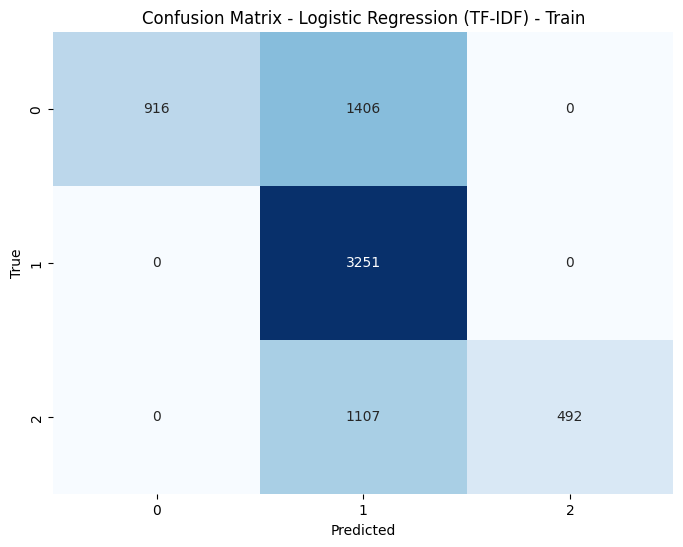

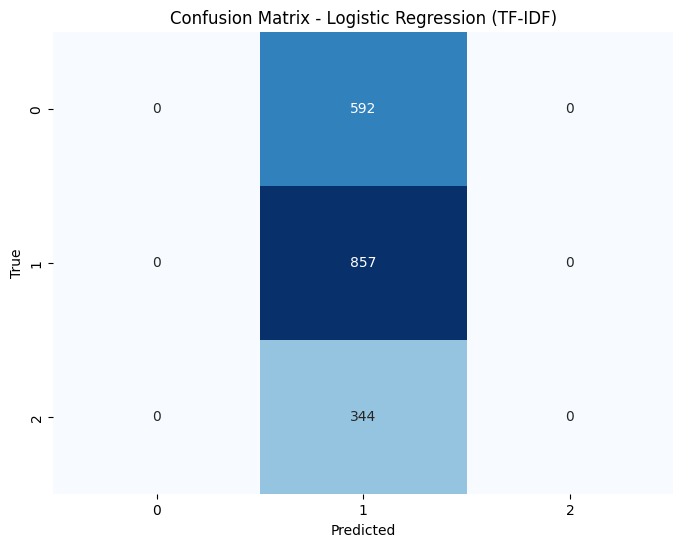

In [111]:
# accuracy score
print("Logistic Regression Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_lr_word2vec_train))
print("Logistic Regression Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_lr_word2vec_test))

print("Logistic Regression TF-IDF Train Accuracy:", accuracy_score(y_train, y_pred_lr_tfidf_train))
print("Logistic Regression TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf_test))

# Plot confusion matrix untuk model Logistic Regression dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_lr_word2vec_train, title='Confusion Matrix - Logistic Regression (Word2Vec) - Train')
plot_confusion_matrix(y_test_word2vec, y_pred_lr_word2vec_test, title='Confusion Matrix - Logistic Regression (Word2Vec)')

# Plot confusion matrix untuk model Logistic Regression dengan TF-IDF
plot_confusion_matrix(y_train, y_pred_lr_tfidf_train, title='Confusion Matrix - Logistic Regression (TF-IDF) - Train')
plot_confusion_matrix(y_test, y_pred_lr_tfidf_test, title='Confusion Matrix - Logistic Regression (TF-IDF)')

XGBoost Word2Vec Train Accuracy: 0.9998605688789738
XGBoost Word2Vec Test Accuracy: 0.758505298382599
XGBoost TF-IDF Train Accuracy: 0.4532905744562186
XGBoost TF-IDF Test Accuracy: 0.47796988287785835


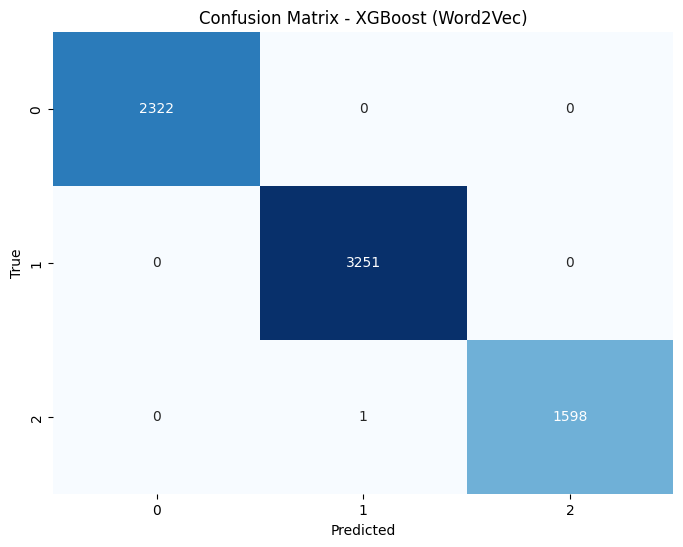

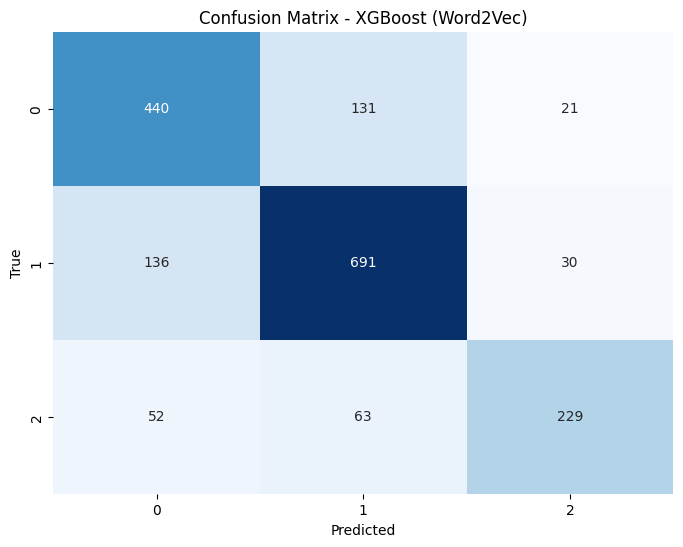

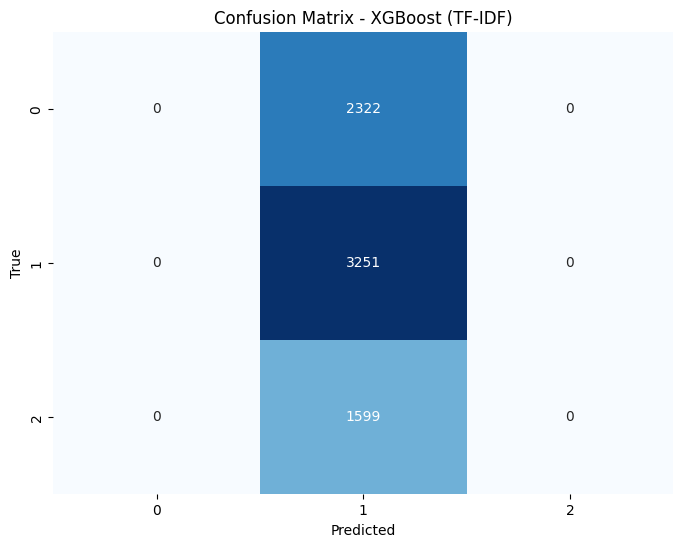

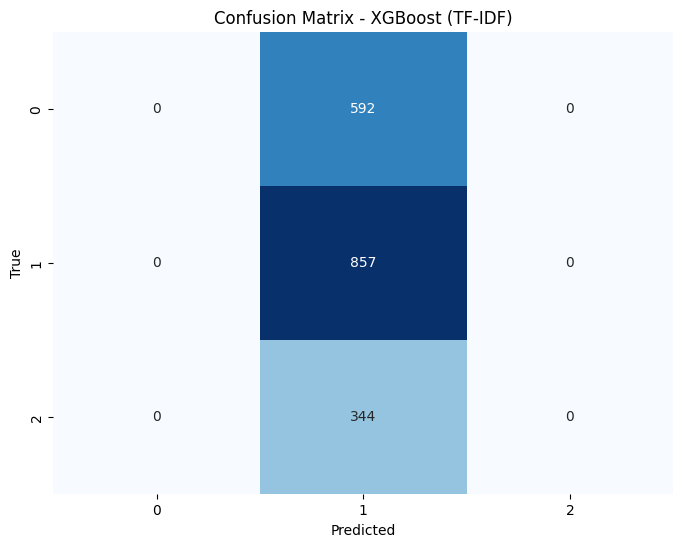

In [116]:
print("XGBoost Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_xgb_word2vec_train))
print("XGBoost Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_xgb_word2vec_test))

print("XGBoost TF-IDF Train Accuracy:", accuracy_score(y_train, y_pred_xgb_tfidf_train))
print("XGBoost TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_xgb_tfidf_test))

# plot confusion matrix untuk model xgboost dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_xgb_word2vec_train, title='Confusion Matrix - XGBoost (Word2Vec)')
plot_confusion_matrix(y_test_word2vec, y_pred_xgb_word2vec_test, title='Confusion Matrix - XGBoost (Word2Vec)')

# plot confusion matrix untuk model xgboost dengan TF-IDF
plot_confusion_matrix(y_train, y_pred_xgb_tfidf_train, title='Confusion Matrix - XGBoost (TF-IDF)')
plot_confusion_matrix(y_test, y_pred_xgb_tfidf_test, title='Confusion Matrix - XGBoost (TF-IDF)')

Random Forest Word2Vec Train Accuracy: 1.0
Random Forest Word2Vec Test Accuracy: 0.7596207473508088
Random Forest TF-IDF Train Accuracy: 0.6496095928611266
Random Forest TF-IDF Test Accuracy: 0.47796988287785835


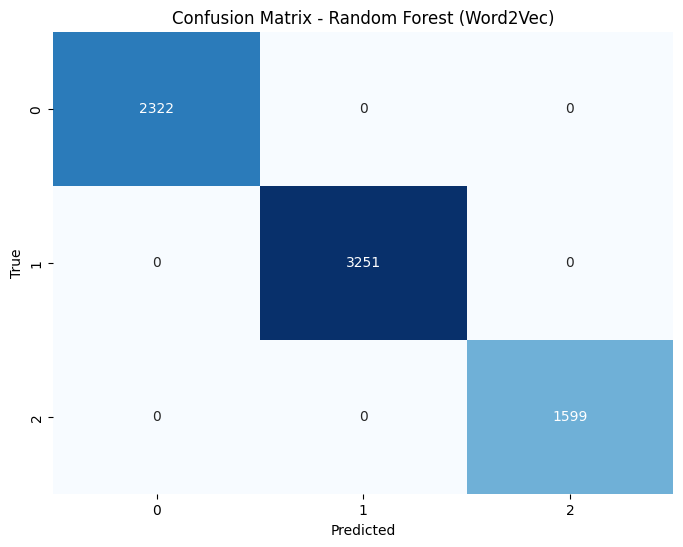

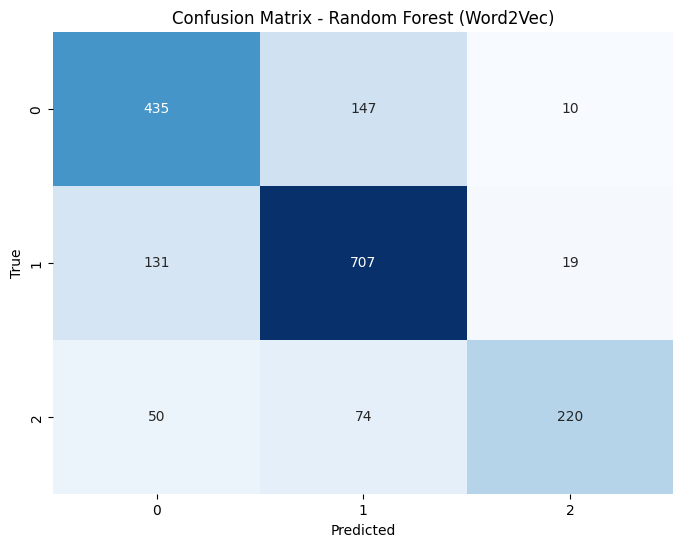

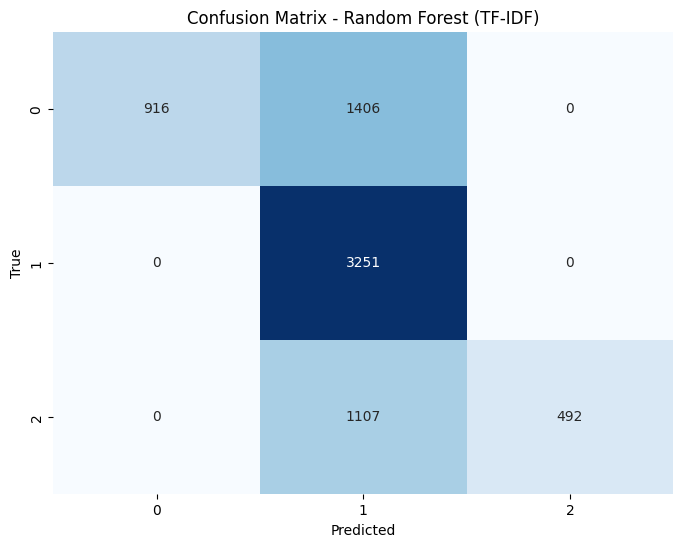

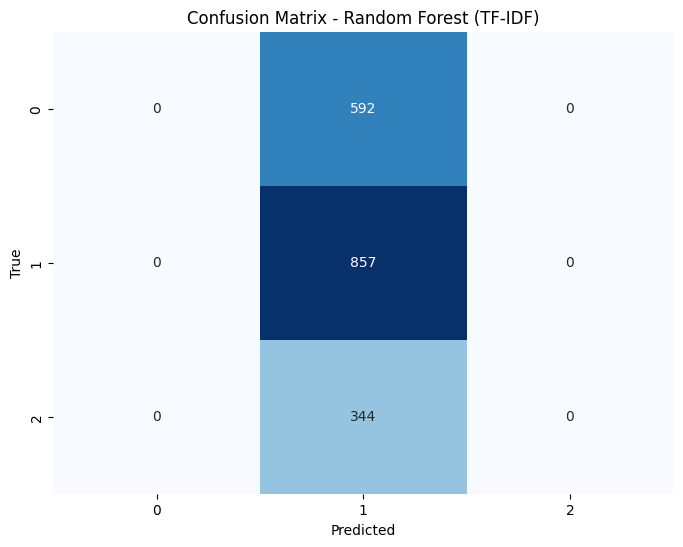

In [117]:
print("Random Forest Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_rf_word2vec_train))
print("Random Forest Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_rf_word2vec_test))

print("Random Forest TF-IDF Train Accuracy:", accuracy_score(y_train, y_pred_rf_tfidf_train))
print("Random Forest TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_rf_tfidf_test))

# plot confusion matrix untuk model Random Forest dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_rf_word2vec_train, title='Confusion Matrix - Random Forest (Word2Vec)')
plot_confusion_matrix(y_test_word2vec, y_pred_rf_word2vec_test, title='Confusion Matrix - Random Forest (Word2Vec)')

# plot confusion matrix untuk model Random Forest dengan TF-IDF
plot_confusion_matrix(y_train, y_pred_rf_tfidf_train, title='Confusion Matrix - Random Forest (TF-IDF)')
plot_confusion_matrix(y_test, y_pred_rf_tfidf_test, title='Confusion Matrix - Random Forest (TF-IDF)')